<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/11thWeekTask/Deep_Learning_Model_For_Dummy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Membuat dummy data
X, y = make_classification(
    n_samples=1000,    # Jumlah data
    n_features=10,     # Jumlah fitur
    n_informative=5,   # Fitur yang relevan untuk klasifikasi
    n_redundant=2,     # Fitur yang redundant (kombinasi linier dari fitur lain)
    n_classes=2,       # Jumlah kelas (binary classification)
    random_state=42    # Agar hasil dapat direproduksi
)

# Mengubah ke DataFrame untuk visualisasi
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['label'] = y

print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   1.125100   1.178124   0.493516   0.790880  -0.614278   1.347020   
1  -0.564641   3.638629  -1.522415  -1.541705   1.616697   4.781310   
2   0.516313   2.165426  -0.628486  -0.386923   0.492518   1.442381   
3   0.537282   0.966618  -0.115420   0.670755  -0.958516   0.871440   
4   0.278385   1.065828  -1.724917  -2.235667   0.715107   0.731249   

   feature_6  feature_7  feature_8  feature_9  label  
0   1.419515   1.357325   0.966041  -1.981139      1  
1   3.190292  -0.890254   1.438826  -3.828748      0  
2   1.332905  -1.958175  -0.348803  -1.804124      0  
3   0.508186  -1.034471  -1.654176  -1.910503      1  
4  -0.674119   0.598330  -0.524283   1.047610      0  


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(16, activation='relu'),                                  # Hidden layer 2
    Dense(1, activation='sigmoid')                                # Output layer (binary classification)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4327 - loss: 0.7518 - val_accuracy: 0.6100 - val_loss: 0.6691
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6874 - loss: 0.6318 - val_accuracy: 0.7450 - val_loss: 0.5789
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7579 - loss: 0.5698 - val_accuracy: 0.8050 - val_loss: 0.5092
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8255 - loss: 0.4992 - val_accuracy: 0.8250 - val_loss: 0.4522
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8319 - loss: 0.4544 - val_accuracy: 0.8300 - val_loss: 0.4036
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8727 - loss: 0.3977 - val_accuracy: 0.8450 - val_loss: 0.3686
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8619 - loss: 0.3834 - val_accuracy: 0.8750 - val_loss: 0.3400
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8681 - loss: 0.3628 - val_accuracy: 0.8950 - val_loss: 0.3174
Ep

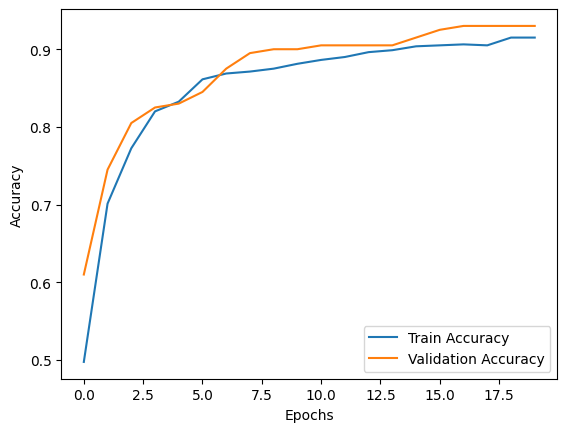

In [3]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [4]:
# IMPORT LIBRARY YANG DIBUTUHKAN
# Penjelasan: Kita akan menggunakan PyTorch untuk membangun MLP, sklearn untuk membuat data dummy, dan library lain untuk membantu analisis.
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MEMBUAT DATA DUMMY
# Penjelasan: Membuat dataset untuk binary classification dengan 10 fitur.
X, y = make_classification(
    n_samples=1000,    # Jumlah sampel: 1000
    n_features=10,     # Jumlah fitur: 10
    n_informative=5,   # Fitur yang relevan: 5
    n_redundant=2,     # Fitur redundant: 2
    n_classes=2,       # Klasifikasi biner
    random_state=42    # Untuk memastikan hasil konsisten
)

In [5]:
# Split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konversi data ke format tensor PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [6]:
# DEFINISI MODEL MLP
# Penjelasan: Membuat model MLP dengan jumlah hidden layer dan neuron yang dapat disesuaikan.
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, activation_function):
        super(MLP, self).__init__()
        layers = []
        prev_size = input_size

        # Membuat hidden layers
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            if activation_function == "relu":
                layers.append(nn.ReLU())
            elif activation_function == "sigmoid":
                layers.append(nn.Sigmoid())
            elif activation_function == "tanh":
                layers.append(nn.Tanh())
            prev_size = hidden_size

        # Output layer (binary classification)
        layers.append(nn.Linear(prev_size, 2)) # Output 2 karena binary classification
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [7]:
# FUNGSI TRAINING
# Penjelasan: Fungsi untuk melatih model dan mencatat akurasi pada data train dan test.
def train_model(model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs, batch_size):
    train_loader = torch.utils.data.DataLoader(
        dataset=list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True
    )

    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

        # Evaluasi akurasi pada train dan test
        model.eval()
        with torch.no_grad():
            train_outputs = model(X_train)
            test_outputs = model(X_test)

            train_pred = torch.argmax(train_outputs, dim=1)
            test_pred = torch.argmax(test_outputs, dim=1)

            train_acc = (train_pred == y_train).sum().item() / len(y_train)
            test_acc = (test_pred == y_test).sum().item() / len(y_test)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

In [8]:
# EXPERIMENTAL LOOP
# Penjelasan: Melakukan eksperimen dengan berbagai kombinasi hyperparameter.
hidden_layer_options = [[32], [32, 16], [32, 16, 8]]  # Jumlah hidden layers dan neuron
activation_functions = ["relu", "sigmoid", "tanh"]
epoch_options = [1, 10, 25, 50, 100, 250]
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128, 256, 512]

results = []  # Menyimpan hasil eksperimen

for hidden_layers in hidden_layer_options:
    for activation_function in activation_functions:
        for epochs in epoch_options:
            for learning_rate in learning_rates:
                for batch_size in batch_sizes:
                    print(f"Training with HL={hidden_layers}, AF={activation_function}, EP={epochs}, LR={learning_rate}, BS={batch_size}")

                    # Membuat model baru
                    model = MLP(input_size=10, hidden_sizes=hidden_layers, activation_function=activation_function)
                    criterion = nn.CrossEntropyLoss()  # Loss function untuk klasifikasi
                    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                    # Train model
                    train_acc, test_acc = train_model(
                        model, optimizer, criterion, X_train, y_train, X_test, y_test, epochs, batch_size
                    )

                    # Simpan hasil
                    results.append({
                        "hidden_layers": hidden_layers,
                        "activation_function": activation_function,
                        "epochs": epochs,
                        "learning_rate": learning_rate,
                        "batch_size": batch_size,
                        "train_accuracy": train_acc[-1],
                        "test_accuracy": test_acc[-1]
                    })

# KONVERSI HASIL KE DATAFRAME UNTUK ANALISIS
results_df = pd.DataFrame(results)


Training with HL=[32], AF=relu, EP=1, LR=10, BS=16
Training with HL=[32], AF=relu, EP=1, LR=10, BS=32
Training with HL=[32], AF=relu, EP=1, LR=10, BS=64
Training with HL=[32], AF=relu, EP=1, LR=10, BS=128
Training with HL=[32], AF=relu, EP=1, LR=10, BS=256
Training with HL=[32], AF=relu, EP=1, LR=10, BS=512
Training with HL=[32], AF=relu, EP=1, LR=1, BS=16
Training with HL=[32], AF=relu, EP=1, LR=1, BS=32
Training with HL=[32], AF=relu, EP=1, LR=1, BS=64
Training with HL=[32], AF=relu, EP=1, LR=1, BS=128
Training with HL=[32], AF=relu, EP=1, LR=1, BS=256
Training with HL=[32], AF=relu, EP=1, LR=1, BS=512
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=16
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=32
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=64
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=128
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=256
Training with HL=[32], AF=relu, EP=1, LR=0.1, BS=512
Training with HL=[32], AF=relu, EP=1, LR=0.01, BS=16
Training with HL=[32

In [9]:
# TAMPILKAN 10 HASIL TERBAIK BERDASARKAN TEST ACCURACY
print("\nTop 10 Results")
print(results_df.sort_values(by="test_accuracy", ascending=False).head(10))


Top 10 Results
     hidden_layers activation_function  epochs  learning_rate  batch_size  \
1503   [32, 16, 8]                relu     250          0.001         128   
849       [32, 16]                relu     250          0.010         128   
1069      [32, 16]             sigmoid     250          0.001          32   
1467   [32, 16, 8]                relu     100          0.001         128   
992       [32, 16]             sigmoid      50          0.010          64   
985       [32, 16]             sigmoid      50          0.100          32   
1351   [32, 16, 8]                relu      10          0.010          32   
1500   [32, 16, 8]                relu     250          0.001          16   
1717   [32, 16, 8]             sigmoid     250          0.001          32   
780       [32, 16]                relu      50          0.001          16   

      train_accuracy  test_accuracy  
1503         1.00000          0.985  
849          0.99875          0.985  
1069         0.95625  

In [10]:
results_df


,hidden_layers,activation_function,epochs,learning_rate,batch_size,train_accuracy,test_accuracy
0,[32],relu,1,10.0000,16,0.85000,0.845
1,[32],relu,1,10.0000,32,0.79375,0.815
2,[32],relu,1,10.0000,64,0.87000,0.905
3,[32],relu,1,10.0000,128,0.66875,0.675
4,[32],relu,1,10.0000,256,0.72250,0.715
...,...,...,...,...,...,...,...
1939,"[32, 16, 8]",tanh,250,0.0001,32,0.90500,0.915
1940,"[32, 16, 8]",tanh,250,0.0001,64,0.85750,0.845
1941,"[32, 16, 8]",tanh,250,0.0001,128,0.86750,0.870
1942,"[32, 16, 8]",tanh,250,0.0001,256,0.83750,0.835


In [11]:
# prompt: Using dataframe results_df: convert to a csv

# Convert the dataframe to a csv file.
results_df.to_csv('results.csv', index=False) # Save to 'results.csv', without the index.
